In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import random
import os 
import imageio 
from IPython.display import Image
import pandas as pd
import csv

# V2

In [4]:
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5
i_max = 100
s_values = [10, 200, 400, 600, 800, 1000]
num_runs = 5
num_samples = len(s_values)
area_estimations_sum = np.zeros((i_max, num_samples, num_runs))
reference_areas = np.zeros((num_samples, num_runs))

for run in range(num_runs):
    print(f"Run {run + 1}/{num_runs}")

    np.random.seed()

    for idx, s in enumerate(s_values):
        reference_s = s
        reference_i_max = 100
        reference_area = 0.0

        for _ in range(reference_s):
            x = np.random.uniform(xmin, xmax)
            y = np.random.uniform(ymin, ymax)
            c = complex(x, y)
            z = c

            for _ in range(reference_i_max):
                if abs(z) > 2.0:
                    break
                z = z * z + c
            else:
                reference_area += 1

        reference_area = (reference_area / reference_s) * (xmax - xmin) * (ymax - ymin)
        reference_areas[idx, run] = reference_area
        print(f"Reference Area for Run {run + 1}: {reference_area}, s: {s}")

        for j in range(1, i_max + 1):
            AM = 0.0
            for _ in range(s):
                x = np.random.uniform(xmin, xmax)
                y = np.random.uniform(ymin, ymax)
                c = complex(x, y)
                z = c

                for _ in range(j):
                    if abs(z) > 2.0:
                        break
                    z = z * z + c
                else:
                    AM += 1

            AM = (AM / s) * (xmax - xmin) * (ymax - ymin)
            area_estimations_sum[j - 1, idx, run] = AM

# Calculate the reference area averages for each 's' value
reference_areas_avg = np.mean(reference_areas, axis=1)
print(reference_areas_avg)

Run 1/5
Reference Area for Run 1: 1.8000000000000003, s: 10
Reference Area for Run 1: 1.7100000000000002, s: 200
Reference Area for Run 1: 1.53, s: 400
Reference Area for Run 1: 1.47, s: 600
Reference Area for Run 1: 1.6312499999999999, s: 800
Reference Area for Run 1: 1.6469999999999998, s: 1000
Run 2/5
Reference Area for Run 2: 0.9000000000000001, s: 10
Reference Area for Run 2: 1.62, s: 200
Reference Area for Run 2: 1.4849999999999999, s: 400
Reference Area for Run 2: 1.77, s: 600
Reference Area for Run 2: 1.81125, s: 800
Reference Area for Run 2: 1.6920000000000002, s: 1000
Run 3/5
Reference Area for Run 3: 0.9000000000000001, s: 10
Reference Area for Run 3: 1.4849999999999999, s: 200
Reference Area for Run 3: 1.5075000000000003, s: 400
Reference Area for Run 3: 1.785, s: 600
Reference Area for Run 3: 1.67625, s: 800
Reference Area for Run 3: 1.6920000000000002, s: 1000
Run 4/5
Reference Area for Run 4: 1.8000000000000003, s: 10
Reference Area for Run 4: 1.62, s: 200
Reference Area

### save the output of the values with increment of iterations by 5 starting at 1

In [5]:
# Save the averaged results and absolute errors to CSV files
csv_filename_avg_area = 'convergence_results_avg_area2.csv'
csv_filename_avg_error = 'convergence_results_avg_error2.csv'
csv_filename_subtraction = 'convergence_results_subtraction2.csv'

with open(csv_filename_avg_area, 'w', newline='') as csvfile_area, open(csv_filename_avg_error, 'w', newline='') as csvfile_error, open(csv_filename_subtraction, 'w', newline='') as csvfile_subtraction:
    fieldnames_area = ['j', 's'] + [f'run_{i + 1}' for i in range(num_runs)] + ['average']
    fieldnames_error = ['j', 's'] + [f'run_{i + 1}' for i in range(num_runs)] + ['average_absolute_error']
    fieldnames_subtraction = ['j', 's'] + [f'run_{i + 1}' for i in range(num_runs)] + ['average_subtraction', 'reference_value']

    writer_area = csv.DictWriter(csvfile_area, fieldnames=fieldnames_area)
    writer_error = csv.DictWriter(csvfile_error, fieldnames=fieldnames_error)
    writer_subtraction = csv.DictWriter(csvfile_subtraction, fieldnames=fieldnames_subtraction)

    # Write headers
    writer_area.writeheader()
    writer_error.writeheader()
    writer_subtraction.writeheader()

    for j in range(1, i_max + 1, 1):
        for idx, s in enumerate(s_values):
            row_data_area = {'j': j, 's': s, 'average': np.mean(area_estimations_sum[j - 1, idx])}
            row_data_area.update({f'run_{run + 1}': area_estimations_sum[j - 1, idx, run] for run in range(num_runs)})

            writer_area.writerow(row_data_area)

            row_data_error = {'j': j, 's': s}
            error_run_values = []

            for run in range(num_runs):
                error_value = area_estimations_sum[j - 1, idx, run] - reference_areas_avg[idx]
                error_run_values.append(error_value)
                row_data_error[f'run_{run + 1}'] = error_value

            row_data_error['average_absolute_error'] = np.mean(np.abs(error_run_values))
            writer_error.writerow(row_data_error)

            row_data_subtraction = {'j': j, 's': s, 'reference_value': reference_areas_avg[idx]}

            subtraction_run_values = [abs(error) for error in error_run_values]
            row_data_subtraction['average_subtraction'] = np.mean(subtraction_run_values)
            row_data_subtraction.update({f'run_{run + 1}': error for run, error in enumerate(subtraction_run_values)})

            writer_subtraction.writerow(row_data_subtraction)

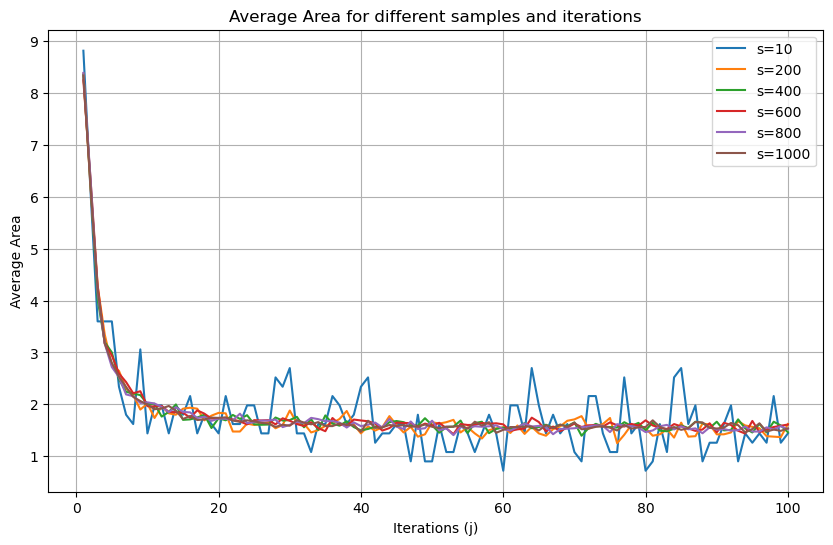

In [6]:
# Read the CSV file
data = pd.read_csv('convergence_results_avg_area2.csv')

# Extract the unique 's' values
s_values = data['s'].unique()

plt.figure(figsize=(10, 6))

# Plotting for each 's' value
for s in s_values:
    s_data = data[data['s'] == s]
    plt.plot(s_data['j'], s_data['average'], label=f's={s}')

# Plot settings
plt.xlabel('Iterations (j)')
plt.ylabel('Average Area')
plt.title('Average Area for different samples and iterations')
plt.legend()
plt.grid(True)
plt.show()

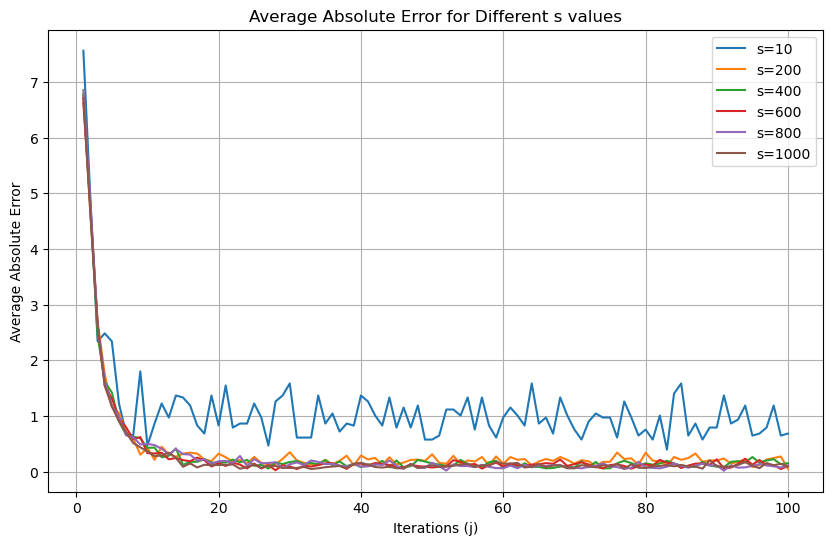

In [7]:
# Load the CSV file
file_path = 'convergence_results_avg_error2.csv'  
data = pd.read_csv(file_path)

# Get unique 's' values
s_values = data['s'].unique()

plt.figure(figsize=(10, 6))

# Plot for each 's' value
for s in s_values:
    s_data = data[data['s'] == s]
    plt.plot(s_data['j'], s_data['average_absolute_error'], label=f's={s}')

plt.xlabel('Iterations (j)')
plt.ylabel('Average Absolute Error')
plt.legend()
plt.title('Average Absolute Error for Different s values')
plt.grid(True)
plt.show()

# V4

In [8]:
from scipy import stats
import time

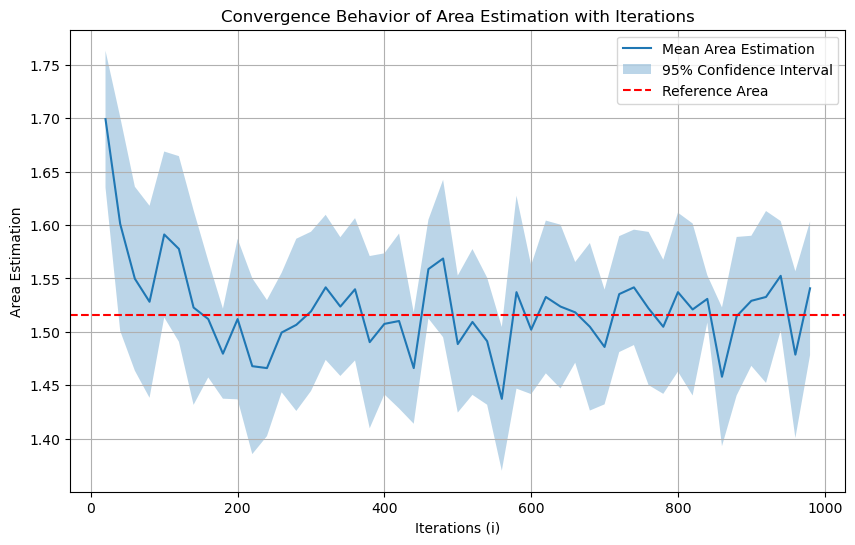

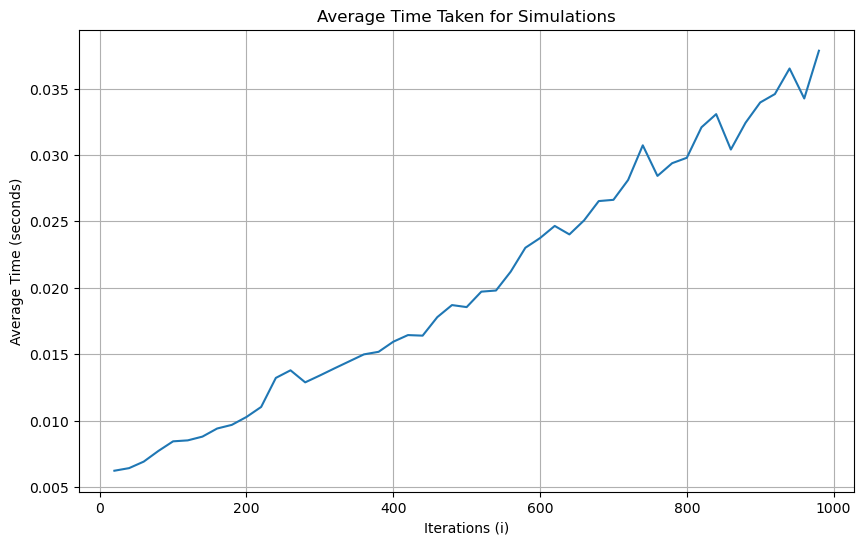

In [9]:
s = 1000
i_values = np.arange(20, 995, 20)
num_runs = 10
reference_i = 1000

def perform_simulation(s, i):
    xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5
    area = 0.0

    for _ in range(s):
        x = np.random.uniform(xmin, xmax)
        y = np.random.uniform(ymin, ymax)
        c = complex(x, y)
        z = c

        for _ in range(i):
            if abs(z) > 2.0:
                break
            z = z * z + c
        else:
            area += 1

    area = (area / s) * (xmax - xmin) * (ymax - ymin)
    return area

# Store results
area_estimations = np.zeros((len(i_values), num_runs))
simulation_times = np.zeros((len(i_values), num_runs))

# Simulations for different i values
for i, i_val in enumerate(i_values):
    for run in range(num_runs):
        start_time = time.time()
        area_estimations[i, run] = perform_simulation(s, i_val)
        end_time = time.time()
        simulation_times[i, run] = end_time - start_time

# Baseline computation
reference_area = np.mean([perform_simulation(s, reference_i) for _ in range(1000)])

# Calculate mean and confidence intervals
mean_area_estimations = np.mean(area_estimations, axis=1)
std_area_estimates = np.std(area_estimations, axis=1)
t_value = stats.t.ppf(1 - 0.025, num_runs - 1)
margin_of_error = t_value * (std_area_estimates / np.sqrt(num_runs))

upper_bound = mean_area_estimations + margin_of_error
lower_bound = mean_area_estimations - margin_of_error

# Calculate average time over 5 runs for each iteration
average_times = np.mean(simulation_times, axis=1)

# Plotting area estimations
plt.figure(figsize=(10, 6))
plt.plot(i_values, mean_area_estimations, label="Mean Area Estimation")
plt.fill_between(i_values, lower_bound, upper_bound, alpha=0.3, label="95% Confidence Interval")
plt.axhline(y=reference_area, color='r', linestyle='--', label="Reference Area")

plt.xlabel('Iterations (i)')
plt.ylabel('Area Estimation')
plt.title('Convergence Behavior of Area Estimation with Iterations')
plt.legend()
plt.grid()
plt.show()

# Plotting average time taken for each iteration
plt.figure(figsize=(10, 6))
plt.plot(i_values, average_times)
plt.xlabel('Iterations (i)')
plt.ylabel('Average Time (seconds)')
plt.title('Average Time Taken for Simulations')
plt.grid()
plt.show()

# Keep I constant

1.5309


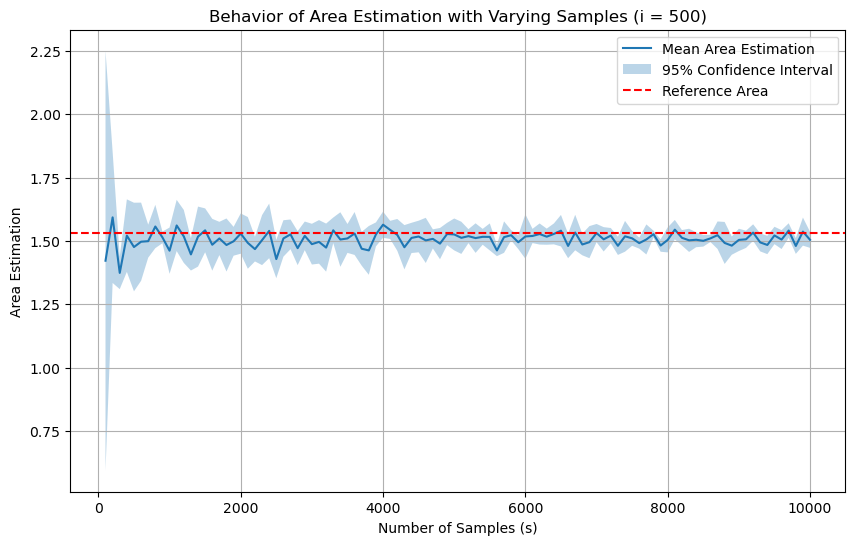

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


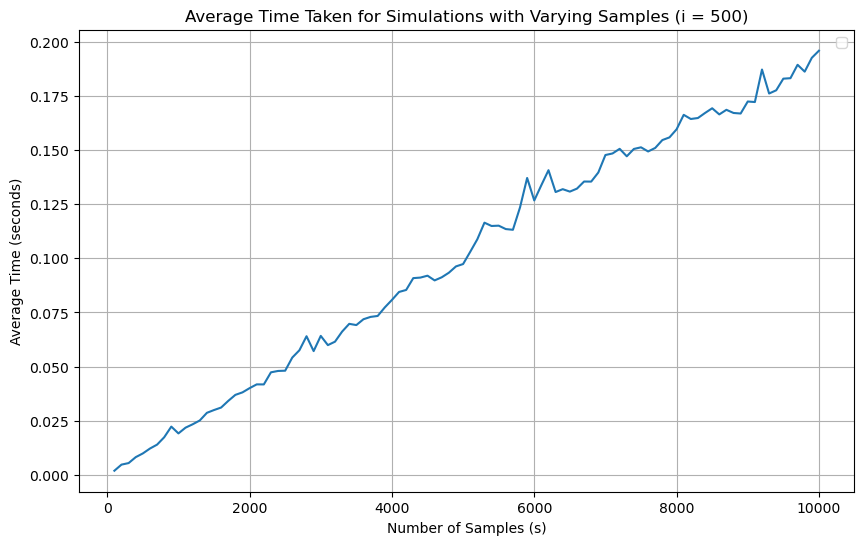

In [10]:
i_val = 500
s_values = np.arange(100, 10100, 100)
num_runs = 5

def perform_simulation(s, i):
    xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5
    area = 0.0

    for _ in range(s):
        x = np.random.uniform(xmin, xmax)
        y = np.random.uniform(ymin, ymax)
        c = complex(x, y)
        z = c

        for _ in range(i):
            if abs(z) > 2.0:
                break
            z = z * z + c
        else:
            area += 1

    area = (area / s) * (xmax - xmin) * (ymax - ymin)
    return area

# Data structures to store results
area_estimations = np.zeros((len(s_values), num_runs))
simulation_times = np.zeros((len(s_values), num_runs))

# Simulations for different s values
for i, s_val in enumerate(s_values):
    for run in range(num_runs):
        start_time = time.time()
        area_estimations[i, run] = perform_simulation(s_val, i_val)
        end_time = time.time()
        simulation_times[i, run] = end_time - start_time

# Baseline computation using the maximum i and s values
reference_area = perform_simulation(s_values[-1], i_val)

print(reference_area)
# Calculate mean and confidence intervals
mean_area_estimations = np.mean(area_estimations, axis=1)
std_area_estimates = np.std(area_estimations, axis=1)
t_value = stats.t.ppf(1 - 0.025, num_runs - 1)
margin_of_error = t_value * (std_area_estimates / np.sqrt(num_runs))

upper_bound = mean_area_estimations + margin_of_error
lower_bound = mean_area_estimations - margin_of_error

# Calculate average time over 5 runs for each s value
average_times = np.mean(simulation_times, axis=1)

# Plotting area estimations
plt.figure(figsize=(10, 6))
plt.plot(s_values, mean_area_estimations, label="Mean Area Estimation")
plt.fill_between(s_values, lower_bound, upper_bound, alpha=0.3, label="95% Confidence Interval")
plt.axhline(y=reference_area, color='r', linestyle='--', label="Reference Area")

plt.xlabel('Number of Samples (s)')
plt.ylabel('Area Estimation')
plt.title(f'Behavior of Area Estimation with Varying Samples (i = {i_val})')
plt.legend()
plt.grid()
plt.show()

# Plotting average time taken for each s value
plt.figure(figsize=(10, 6))
plt.plot(s_values, average_times)
plt.xlabel('Number of Samples (s)')
plt.ylabel('Average Time (seconds)')
plt.title(f'Average Time Taken for Simulations with Varying Samples (i = {i_val})')
plt.legend()
plt.grid()
plt.show()